## LEAD SCORING CASE STUDY

Identification of hot leads to focus more on them and thus enhancing the conversion ratio.


### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, we need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed me to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires me to build a model wherein I'll need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Importing Libraries & Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
     

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format


### Data Loading and Observing

In [3]:
df_data = pd.read_csv("Leads.csv")
df_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [4]:
# Dataframe (Shape, Datatype)
df_data.shape

(9240, 37)

In [5]:
#check statistics for numerical columns
df_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [6]:
# check whether there are any duplicates
df_data.duplicated().sum()

0

In [7]:
# all columns, their datatypes and also get an idea of null values present
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Conversion Rate for past orders
round(len(df_data[df_data['Converted']==1].index)/len(df_data.index)*100,2)

38.54

### Data Cleaning (Columns)

In [9]:
# Dropping duplicate rows
df_data=df_data.drop_duplicates()

In [10]:
# Replacing the value 'Select' with 'NaN' since 'Select' signifies that the person who filled the form did not selected any value
df_data = df_data.replace('Select', np.nan)
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [11]:
# Making list of un-usable columns, due to most NaN value (Taking an arbitrary value >20 %)
unnecessary_column = set((pd.isnull(df_data).sum()/len(df_data.index) > .2).index)

# Making list of un-necessary columns from Analysis point of view
unnecessary_column = {'Prospect ID', 'Lead Number'}

# Making list of numerical columns from Analysis point of view
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

# Making list of categorical columns from Analysis point of view
categorical_column = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'}

# Making list of Target/Output column from Analysis point of view
target_column = {'Converted'}

In [12]:
# Dropping un-usable and un-necessary columns
df_data = df_data[list(numerical_column | categorical_column | target_column)]

In [13]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Get updates on DM Content                  0.00
Do Not Email                               0.00
Last Notable Activity                      0.00
Page Views Per Visit                       1.48
Receive More Updates About Our Courses     0.00
Update me on Supply Chain Content          0.00
Magazine                                   0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
A free copy of Mastering The Interview     0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
I agree to pay the amount through cheque   0.00
Lead Origin                                0.00
Lead Source                                0.39
Last Activity                              1.11
Through Recommendations                    0.00
Converted                                  0.00
X Education Forums                         0.00
Search                                     0.00
Do Not Call                             

In [14]:
# removing the columns which have very less variation in data
df_data[list(categorical_column)].describe()

,Get updates on DM Content,Last Notable Activity,Receive More Updates About Our Courses,Update me on Supply Chain Content,Magazine,Digital Advertisement,Newspaper,A free copy of Mastering The Interview,Newspaper Article,I agree to pay the amount through cheque,Lead Origin,Lead Source,Last Activity,Through Recommendations,X Education Forums,Search,Do Not Call,Do Not Email
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9204,9137,9240,9240,9240,9240,9240
unique,1,16,1,1,1,2,2,2,2,1,5,21,17,2,2,2,2,2
top,No,Modified,No,No,No,No,No,No,No,No,Landing Page Submission,Google,Email Opened,No,No,No,No,No
freq,9240,3407,9240,9240,9240,9236,9239,6352,9238,9240,4886,2868,3437,9233,9239,9226,9238,8506


In [15]:
# Adding columns with negligible or no variation to unnecessary_column and removing from Dataframe since they would not serve any purpose for our analysis

# 'Get updates on DM Content' since all rows have same value, i.e. 'No'
unnecessary_column.add('Get updates on DM Content')
categorical_column.remove('Get updates on DM Content')

# 'Newspaper Article' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Newspaper Article')
categorical_column.remove('Newspaper Article')

# 'Magazine' since all rows have same value, i.e. 'No'
unnecessary_column.add('Magazine')
categorical_column.remove('Magazine')

# 'I agree to pay the amount through cheque' since all rows have same value, i.e. 'No'
unnecessary_column.add('I agree to pay the amount through cheque')
categorical_column.remove('I agree to pay the amount through cheque')

# 'Receive More Updates About Our Courses' since all rows have same value, i.e. 'No'
unnecessary_column.add('Receive More Updates About Our Courses')
categorical_column.remove('Receive More Updates About Our Courses')

# 'Update me on Supply Chain Content' since all rows have same value, i.e. 'No'
unnecessary_column.add('Update me on Supply Chain Content')
categorical_column.remove('Update me on Supply Chain Content')

# 'Newspaper' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Newspaper')
categorical_column.remove('Newspaper')

# 'Through Recommendations' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Through Recommendations')
categorical_column.remove('Through Recommendations')

# 'Search' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Search')
categorical_column.remove('Search')

# 'Do Not Call' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Do Not Call')
categorical_column.remove('Do Not Call')

# 'Digital Advertisement' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Digital Advertisement')
categorical_column.remove('Digital Advertisement')

# 'X Education Forums' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('X Education Forums')
categorical_column.remove('X Education Forums')

# Dropping un-usable and un-necessary columns
df_data = df_data[list(numerical_column | categorical_column | target_column)]

# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Total Time Spent on Website              0.00
Do Not Email                             0.00
Lead Origin                              0.00
Last Notable Activity                    0.00
Lead Source                              0.39
Page Views Per Visit                     1.48
Last Activity                            1.11
Converted                                0.00
A free copy of Mastering The Interview   0.00
TotalVisits                              1.48
dtype: float64

### Data Cleaning (Rows)

In [16]:
# Dropping rows with most NaN value (Taking an arbitrary value >20 %)
threshold = int(.2*len(df_data.columns))
df_data.dropna(thresh=2, inplace=True)

In [17]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),5)

Percentage of null values per column


Total Time Spent on Website              0.00
Do Not Email                             0.00
Lead Origin                              0.00
Last Notable Activity                    0.00
Lead Source                              0.39
Page Views Per Visit                     1.48
Last Activity                            1.11
Converted                                0.00
A free copy of Mastering The Interview   0.00
TotalVisits                              1.48
dtype: float64

In [18]:
# Observing Categorical Columns
df_data[list(categorical_column)].describe()

,Last Notable Activity,A free copy of Mastering The Interview,Lead Origin,Lead Source,Last Activity,Do Not Email
count,9240,9240,9240,9204,9137,9240
unique,16,2,5,21,17,2
top,Modified,No,Landing Page Submission,Google,Email Opened,No
freq,3407,6352,4886,2868,3437,8506


In [19]:
# 'Last Activity' have 1.33841 % 'NaN' values;-Imputing values for 'Last Activity',Replacing 'NaN' with 'Email Opened'
df_data[['Last Activity']]=df_data[['Last Activity']].fillna(value='Email Opened')

# 'Lead Source' have 0.34116 % 'NaN' values;-Imputing values for 'Lead Source' ,Replacing 'NaN' with 'Google'
df_data[['Lead Source']]=df_data[['Lead Source']].fillna(value='Google')

In [20]:
# Observing Numeric Columns
df_data[list(numerical_column)].describe()

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,9240.00,9103.00,9103.00
mean,487.70,2.36,3.45
std,548.02,2.16,4.85
min,0.00,0.00,0.00
25%,12.00,1.00,1.00
50%,248.00,2.00,3.00
75%,936.00,3.00,5.00
max,2272.00,55.00,251.00


In [21]:
# Imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%) and variation in data is low.
df_data[['Page Views Per Visit']]=df_data[['Page Views Per Visit']].fillna(value=df_data[['Page Views Per Visit']].mean())
df_data[['TotalVisits']]=df_data[['TotalVisits']].fillna(value=df_data[['TotalVisits']].mean())

In [22]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),5)

Percentage of null values per column


Total Time Spent on Website              0.00
Do Not Email                             0.00
Lead Origin                              0.00
Last Notable Activity                    0.00
Lead Source                              0.00
Page Views Per Visit                     0.00
Last Activity                            0.00
Converted                                0.00
A free copy of Mastering The Interview   0.00
TotalVisits                              0.00
dtype: float64

In [23]:
# Shape of new Dataframe
print(f'Shape of Data: {df_data.shape}', end="\n\n")

Shape of Data: (9240, 10)



### Exploratory Data Analysis (I)

In [24]:
def num_col_univariate_analysis(c):
    plt.figure(figsize=(4,4))
    ax=sns.boxplot(y=c,data=df_data)
    plt.show()

In [25]:
def cat_col_univariate_analysis(c):
    sns.catplot(y=c,data=df_data,kind="count")
    plt.show()

In [26]:
def num_col_bivariate_analysis(c1,c2):
    plt.figure(figsize=(4,4))
    ax=sns.boxplot(x=c1,y=c2,data=df_data)
    plt.show()

In [27]:
def cat_col_bivariate_analysis(c1,c2):
    sns.catplot(col=c1,y=c2,data=df_data,kind="count")
    plt.show()

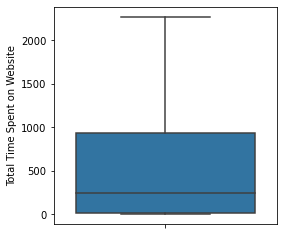

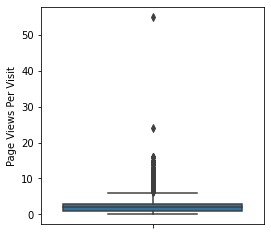

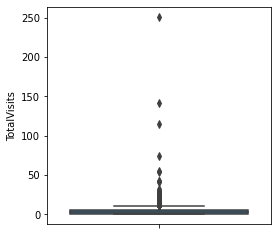

In [28]:
# Univariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_univariate_analysis(c)

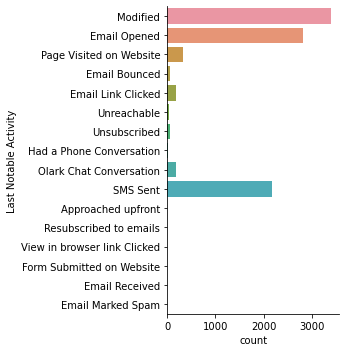

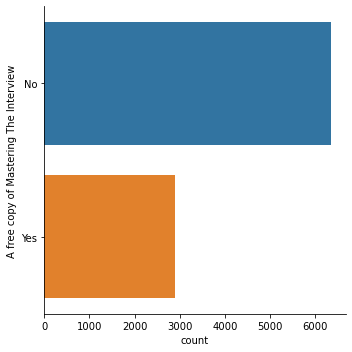

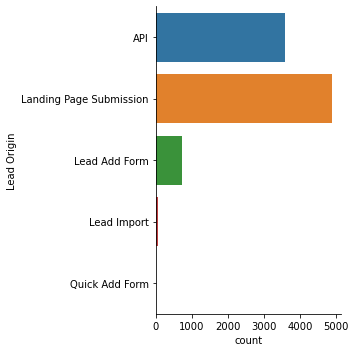

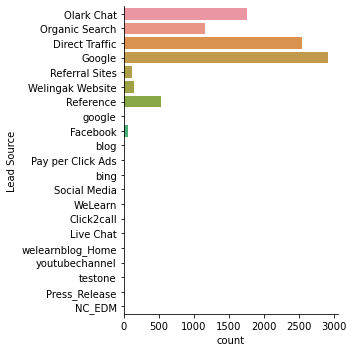

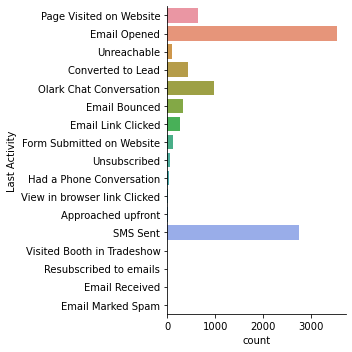

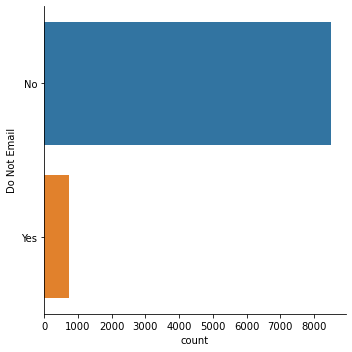

In [29]:
# Univariate Analysis of Numerical Columns
for c in categorical_column:
  cat_col_univariate_analysis(c)

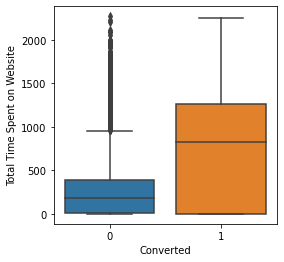

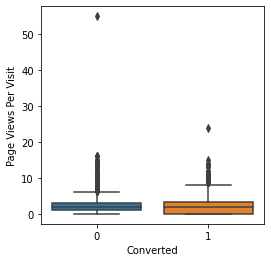

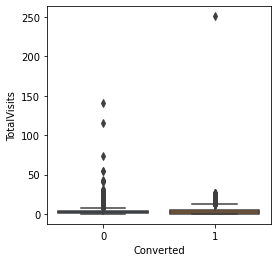

In [30]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

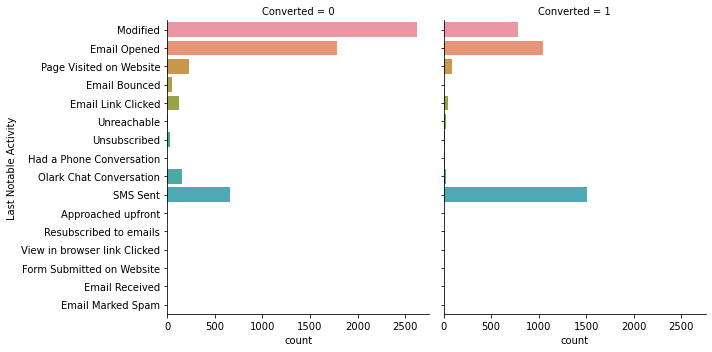

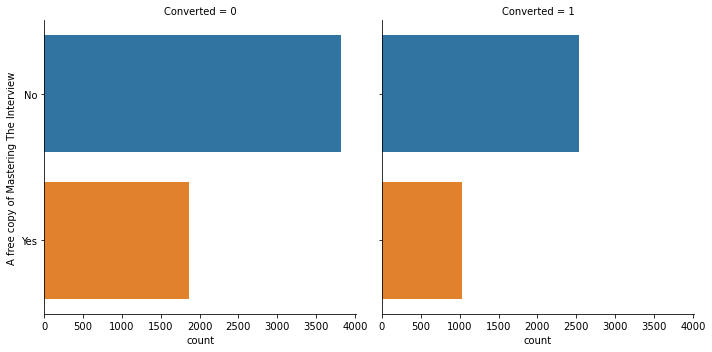

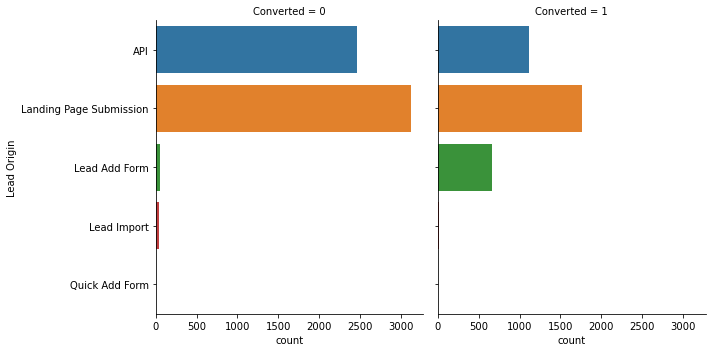

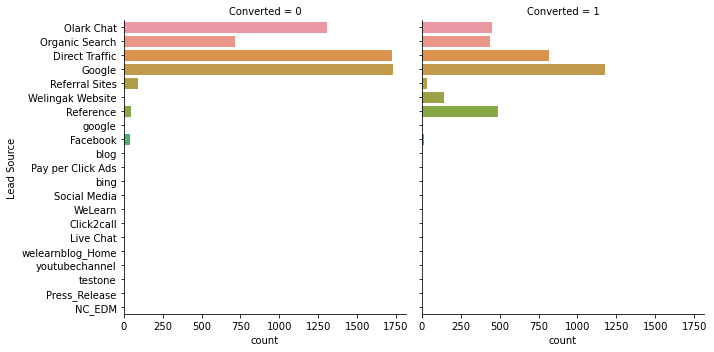

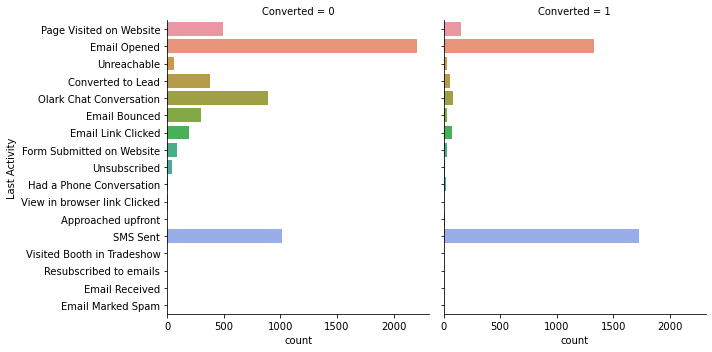

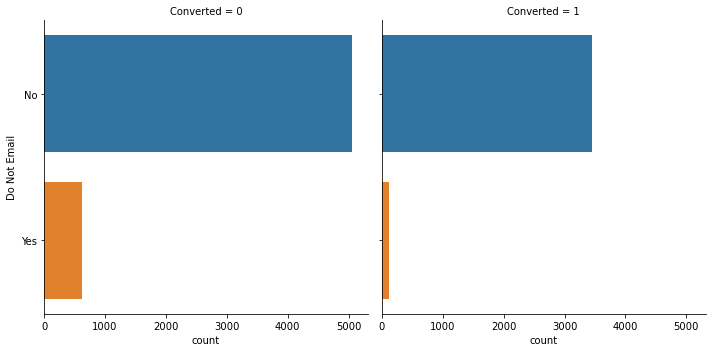

In [31]:
# Bivariate Analysis of Categorical Columns
for c in categorical_column:
  cat_col_bivariate_analysis('Converted',c)

<AxesSubplot:>

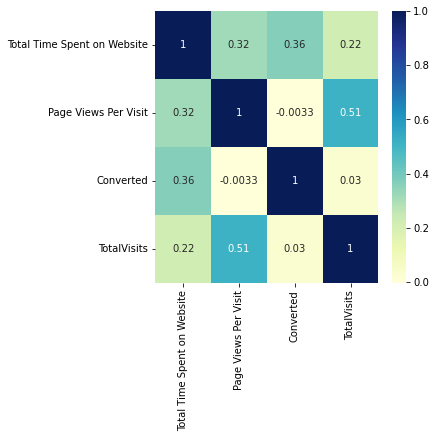

In [32]:
# Visualizing the correlation between all set of usable columns (heatmap)
plt.figure(figsize=(5, 5))
sns.heatmap(df_data.corr(), cmap="YlGnBu",annot=True)

Summary: Upon observing numerous plots above in EDA (I), we conclude the following points:

Univariate Analysis Conclusion:

There is low variation in Page Views Per Visit and TotalVisits but higher variation in Total Time Spent on Website
There are a lot of outliers in Page Views Per Visit and TotalVisits which needs to be treated before modelling
Bivariate Analysis Conclusion:

There is positive correlation between Total Time Spent on Website and Conversion
There is come correlation between Conversion and some categorical columns like Lead Origin and Lead Source
Correlation Analysis (Heatmap) Conclusion:

There is positive correlation between Total Time Spent on Website and Conversion
There is almost no correlation in Page Views Per Visit and TotalVisits with Conversion

### Creating Dummy variables

In [33]:
# Listing out columns for creating dummy variables:
df_data[list(categorical_column)].describe()

,Last Notable Activity,A free copy of Mastering The Interview,Lead Origin,Lead Source,Last Activity,Do Not Email
count,9240,9240,9240,9240,9240,9240
unique,16,2,5,21,17,2
top,Modified,No,Landing Page Submission,Google,Email Opened,No
freq,3407,6352,4886,2904,3540,8506


In [34]:
# Creating dummy variables and drop_first to avoid multicollinearity:
df_data=pd.get_dummies(data=df_data,columns=list(categorical_column),drop_first=True)
del categorical_column
df_data_usable_columns=set(df_data.columns)

In [35]:
# Overview of Dataframe (Shape, Datatype)
print(f'Shape of Data: {df_data.shape}', end="\n\n")
print('Information of Data')
print(f'{df_data.info()}', end="\n\n")
# Overview of Dataframe (Description, % of NaN) 
print('Description of Data')
print(f'{df_data.describe()}', end="\n\n")
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Shape of Data: (9240, 61)

Information of Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Total Time Spent on Website                         9240 non-null   int64  
 1   Page Views Per Visit                                9240 non-null   float64
 2   Converted                                           9240 non-null   int64  
 3   TotalVisits                                         9240 non-null   float64
 4   Last Notable Activity_Email Bounced                 9240 non-null   uint8  
 5   Last Notable Activity_Email Link Clicked            9240 non-null   uint8  
 6   Last Notable Activity_Email Marked Spam             9240 non-null   uint8  
 7   Last Notable Activity_Email Opened                  9240 non-null   uint8  
 8   Last Notable Activity_Email Rec

Total Time Spent on Website                          0.00
Page Views Per Visit                                 0.00
Converted                                            0.00
TotalVisits                                          0.00
Last Notable Activity_Email Bounced                  0.00
Last Notable Activity_Email Link Clicked             0.00
Last Notable Activity_Email Marked Spam              0.00
Last Notable Activity_Email Opened                   0.00
Last Notable Activity_Email Received                 0.00
Last Notable Activity_Form Submitted on Website      0.00
Last Notable Activity_Had a Phone Conversation       0.00
Last Notable Activity_Modified                       0.00
Last Notable Activity_Olark Chat Conversation        0.00
Last Notable Activity_Page Visited on Website        0.00
Last Notable Activity_Resubscribed to emails         0.00
Last Notable Activity_SMS Sent                       0.00
Last Notable Activity_Unreachable                    0.00
Last Notable A

### Exploratory Data Analysis (II)

In [36]:
def bivariate_analysis(c1,c2):
    sns.catplot(col=c1,y=c2,data=df_data,height=2)
    plt.show()

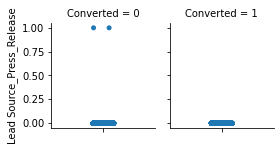

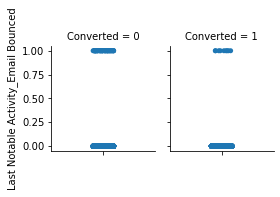

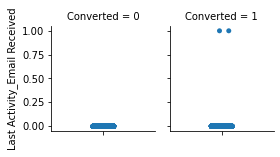

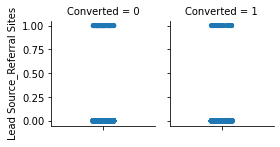

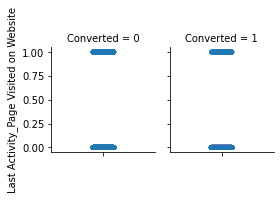

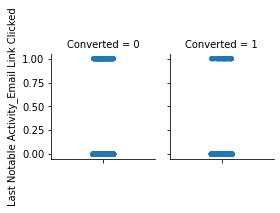

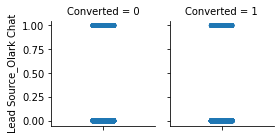

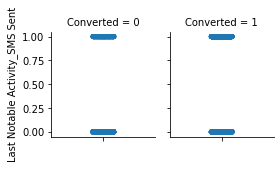

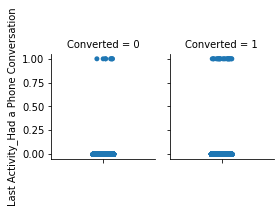

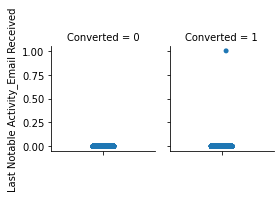

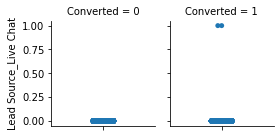

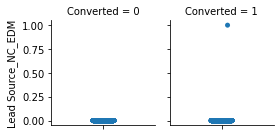

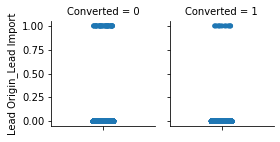

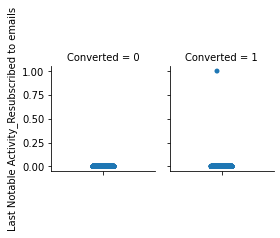

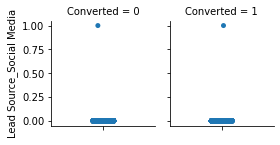

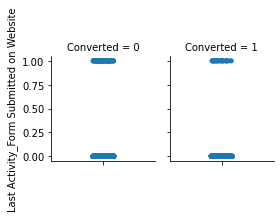

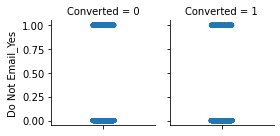

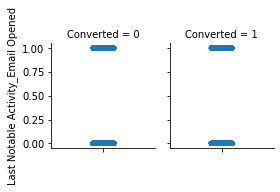

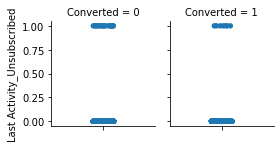

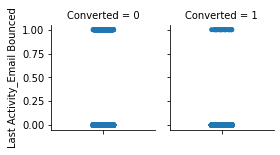

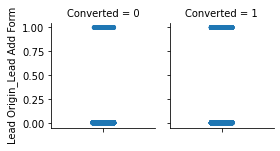

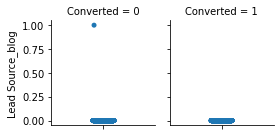

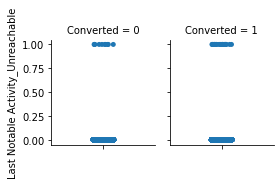

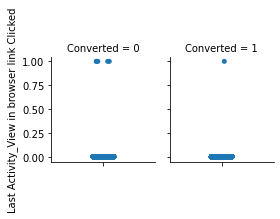

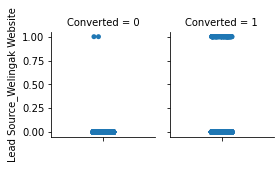

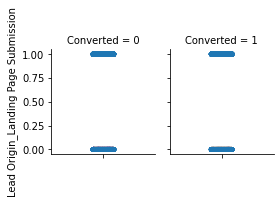

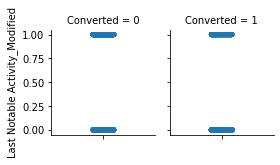

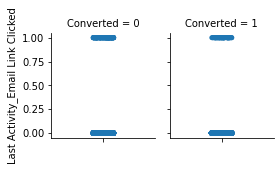

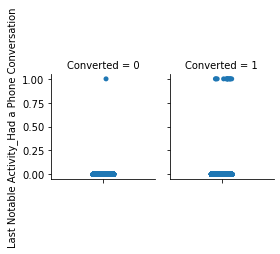

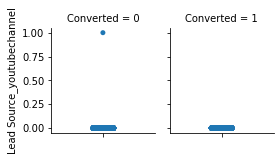

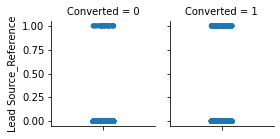

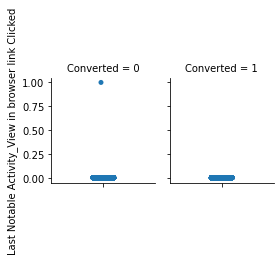

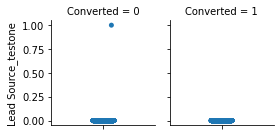

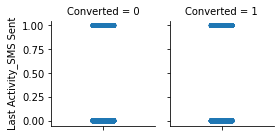

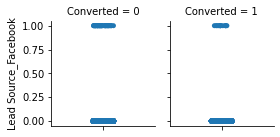

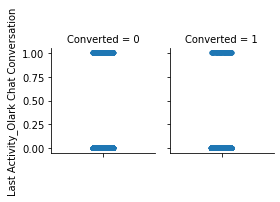

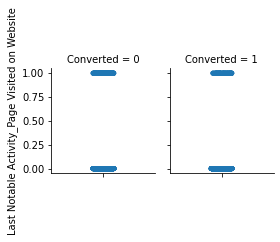

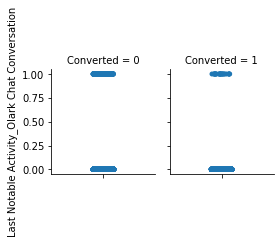

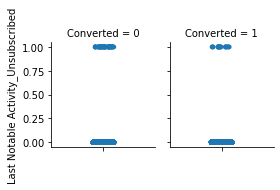

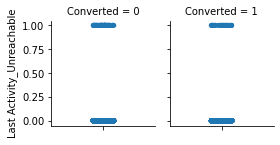

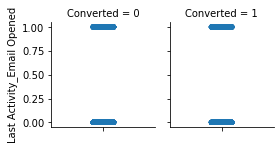

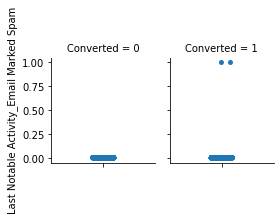

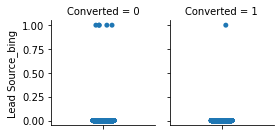

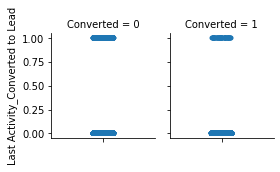

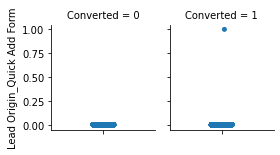

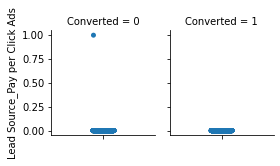

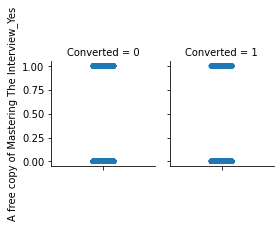

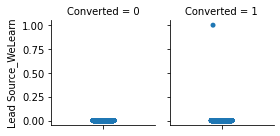

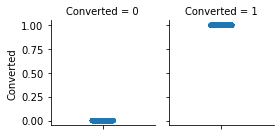

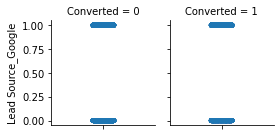

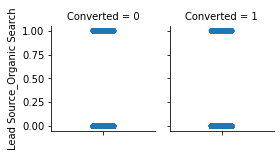

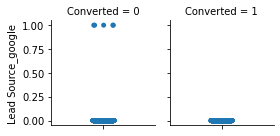

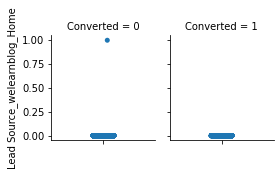

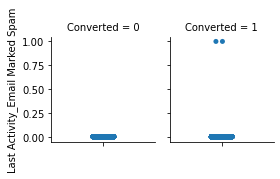

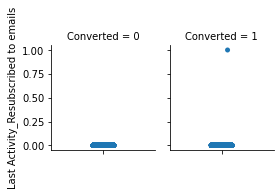

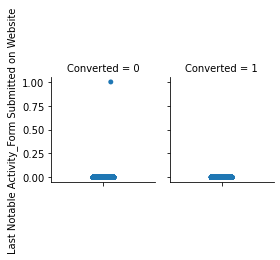

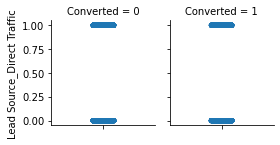

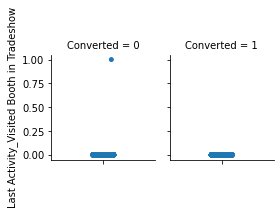

In [37]:
for c in df_data_usable_columns-numerical_column:
    bivariate_analysis('Converted',c)

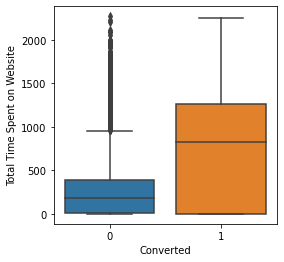

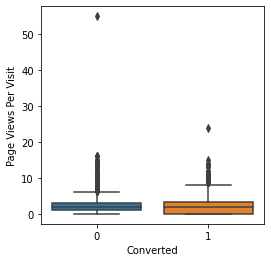

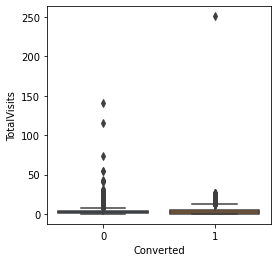

In [38]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

<AxesSubplot:>

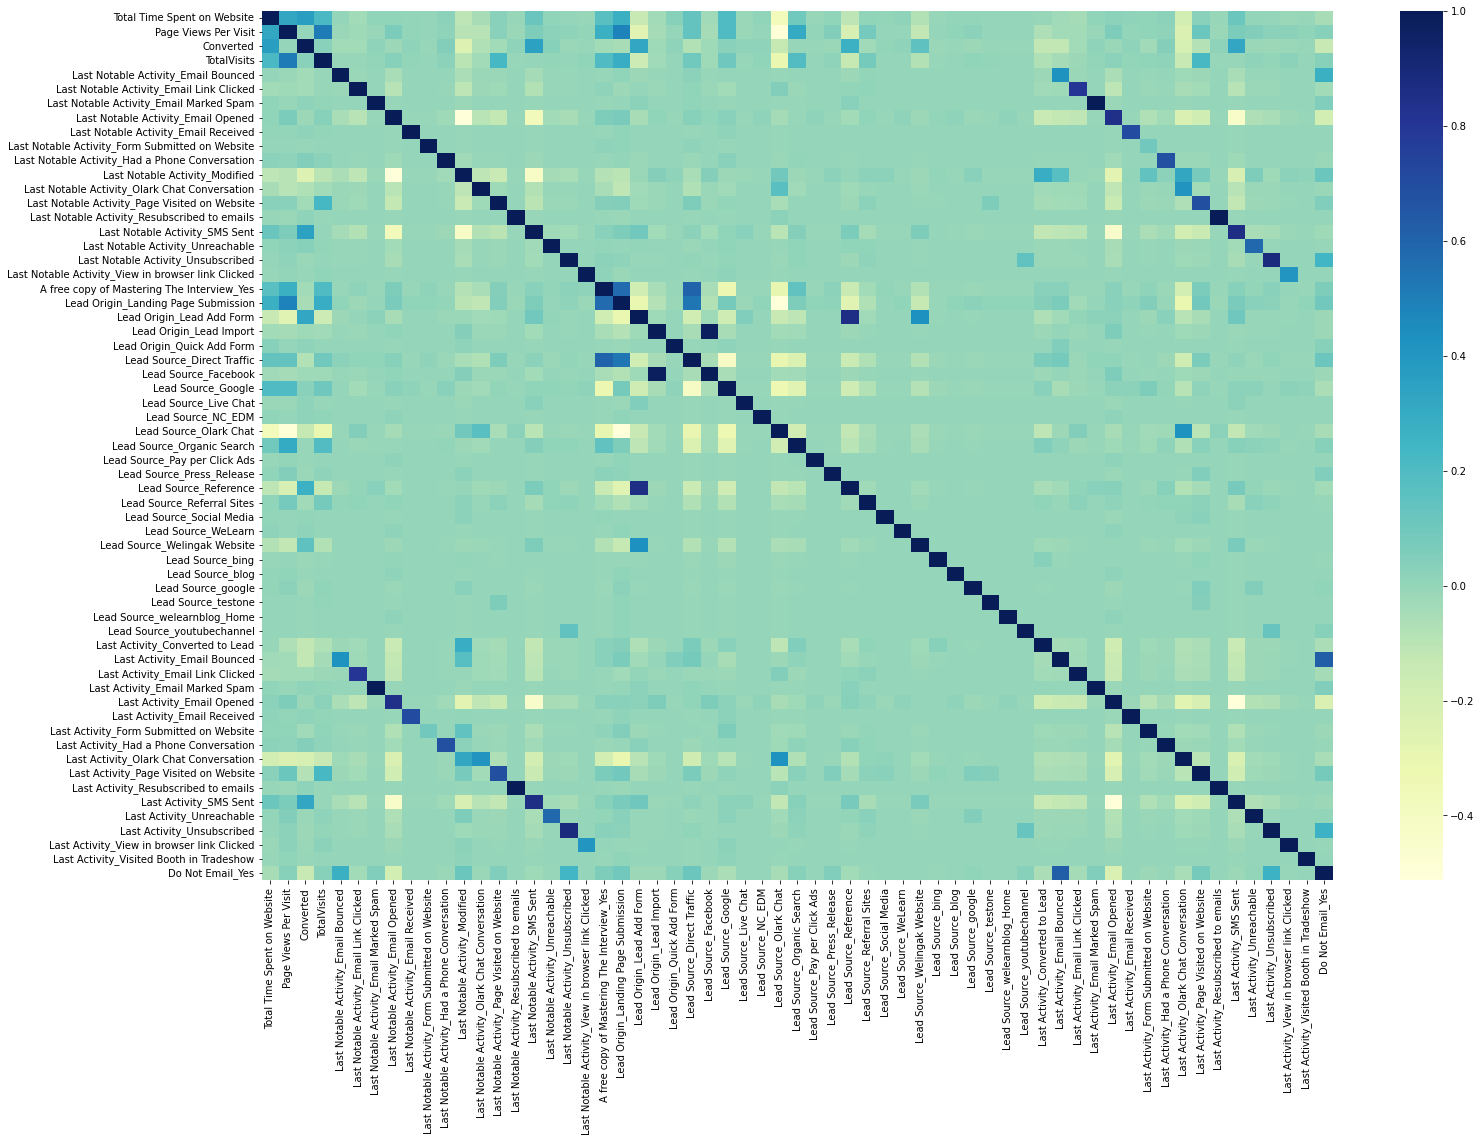

In [39]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(24, 16))
sns.heatmap(df_data.corr(), cmap="YlGnBu")

Note: Upon observing numerous plots above in EDA (II), we conclude the following points:

Bivariate Analysis Conclusion: The following dummy variables seems to have some effect on Conversion:

Lead Origin_Lead Add Form
Last Activity_Email Bounced
Lead Source_Reference
Total Time Spent on Website
Correlation Analysis (Heatmap) Conclusion: The heatmap is not very clear due to huge number of columns, however, we do see a lot of correlation amongst columns, especially dummy variables. Hence we would further reduce the number of columns so as to reluce multicollinearity.



### Outlier Treatment

In [40]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
z = np.abs(stats.zscore(df_data))
# Outlier Records
df_data_outliers = df_data[(z > 3).any(axis=1)]
# Outlier Removed Records
df_data_non_outliers = df_data[(z < 3).all(axis=1)]
df_data_non_outliers.head()

,Total Time Spent on Website,Page Views Per Visit,Converted,TotalVisits,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Do Not Email_Yes
1,674,2.50,0,5.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1532,2.00,1,2.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0.00,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,1640,2.00,1,2.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0.00,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Feature Standardization / Normalization

In [41]:
# Normalising continuous features (numerical columns)
df = df_data_non_outliers[list(numerical_column)]
normalized_df=(df-df.mean())/df.std()
df_data_non_outliers.drop(columns=numerical_column,axis=1,inplace=True)
df_data_normal_non_outliers = pd.concat([df_data_non_outliers,normalized_df],axis=1)

print(f'Percentage of data retained: {100*(df_data_normal_non_outliers.shape[0]/df_data.shape[0]):.2}')
df_data_normal_non_outliers.head()

Percentage of data retained: 6.5e+01


,Converted,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Do Not Email_Yes,Total Time Spent on Website,Page Views Per Visit,TotalVisits
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.26,0.05,0.62
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.80,-0.22,-0.47
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.94,-1.31,-1.19
6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.99,-0.22,-0.47
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.94,-1.31,-1.19


### Splitting Data into Training and Test Sets

In [42]:
# Putting feature variable to X
X = df_data_normal_non_outliers.drop(['Converted'],axis=1)
# Putting response variable to y
y = df_data_normal_non_outliers['Converted']

y.head()

1    0
2    1
5    0
6    1
7    0
Name: Converted, dtype: int64

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3)

### Building Model
#### NOTE: We will use Logistic Regression with RFE in order to build two suitable models as follows:

Model with Moderate Accuracy: To get wider range of audience to target upon (In case we have more resource to engage wider range of audience)
Model with High Accuracy: To get narrow range of audience to target upon (In case we have less resource and want to minimize engagement)

### Building Model : Feature Selection using RFE for Logistic Regression

In [49]:
rfe = RFE(logreg)            
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True])

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Last Notable Activity_Email Bounced', False, 31),
 ('Last Notable Activity_Email Link Clicked', False, 30),
 ('Last Notable Activity_Email Marked Spam', False, 29),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Email Received', True, 1),
 ('Last Notable Activity_Form Submitted on Website', True, 1),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_Page Visited on Website', True, 1),
 ('Last Notable Activity_Resubscribed to emails', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Last Notable Activity_Unreachable', True, 1),
 ('Last Notable Activity_Unsubscribed', False, 2),
 ('Last Notable Activity_View in browser link Clicked', False, 4),
 ('A free copy of Mastering The Interview_Yes', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', False, 10),
 ('Lead Orig

In [51]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'A free copy of Mastering The Interview_Yes',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_View

In [52]:
X_train.columns[~rfe.support_]

Index(['Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
      

#### MODEL-1

In [53]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4166
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 27 Dec 2022   Deviance:                       94406.
Time:                        21:27:04   Pearson chi2:                 4.62e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            3.666e+27   1.87e+20   1.96e+07      0.000    3.67e+27    3.67e+27
Last Notable Activity_Email Opened               5.984e+14    9.5e+07    6.3e+06      0.000    5.98e+14    5.98e+14
Last Notable Activity_Email Received             1.797e+13   9.16e+05   1.96e+07      0.000     1.8e+13     1.8e+13
Last Notable Activity_Form Submitted on Website  3.822e+13   1.95e+06   1.96e+07      0.000    3.82e+13    3.82e+13
Last Notable Activity_Had a Phone Conversation   7.507e+12   3.83e+05   1.96e+07      0.000    7.51e+12    7.51e+12
Last Notable Activity_Modified                   1.987e+13   9.49e+07   2.09e+05      0.000    1.99e+13    1.99e+13
Last Notable Activity_Olark Chat Conversation    -2.07e+13   1.06e+06  -1.96e+07      0.000   -2.07e+13   -2.07e+13
Last Notable Activity_Page Visited on Website    5.164e+13   2.63e+06   1.96e+07      0.000    5.16e+13    5.16e+13
Last Notable Activity_Resubscribed to emails    -3.253e+13   1.66e+06  -1.96e+07      0.000   -3.25e+13   -3.25e+13
Last Notable Activity_SMS Sent                  -4.546e+14    9.5e+07  -4.78e+06      0.000   -4.55e+14   -4.55e+14
Last Notable Activity_Unreachable                5.346e+12   2.73e+05   1.96e+07      0.000    5.35e+12    5.35e+12
A free copy of Mastering The Interview_Yes       3.863e+13   3.35e+06   1.15e+07      0.000    3.86e+13    3.86e+13
Lead Origin_Landing Page Submission             -5.286e+14   3.43e+06  -1.54e+08      0.000   -5.29e+14   -5.29e+14
Lead Source_Direct Traffic                      -3.666e+27   1.87e+20  -1.96e+07      0.000   -3.67e+27   -3.67e+27
Lead Source_Google                              -3.666e+27   1.87e+20  -1.96e+07      0.000   -3.67e+27   -3.67e+27
Lead Source_Olark Chat                          -3.666e+27   1.87e+20  -1.96e+07      0.000   -3.67e+27   -3.67e+27
Lead Source_Organic Search                      -3.666e+27   1.87e+20  -1.96e+07      0.000   -3.67e+27   -3.67e+27
Lead Source_google                                       0          0        nan        nan           0           0
Lead Source_testone                                      0          0        nan        nan           0           0
Lead Source_welearnblog_Home                             0          0        nan        nan           0           0
Lead Source_youtubechannel                               0          0        nan        nan           0           0
Last Activity_Converted to Lead                          0          0        nan        nan           0           0
Last Activity_Email Opened                      -3.272e+15   6.73e+07  -4.86e+07      0.000   -3.27e+15   -3.27e+15
Last Activity_Olark Chat Conversation           -3.015e+15   6.73e+

#### MODEL-2

In [72]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4167
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 27 Dec 2022   Deviance:                   1.2277e+05
Time:                        21:38:19   Pearson chi2:                 6.00e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            8.282e+27   1.89e+20   4.39e+07      0.000    8.28e+27    8.28e+27
Last Notable Activity_Email Opened              -1.184e+15   5.79e+06  -2.04e+08      0.000   -1.18e+15   -1.18e+15
Last Notable Activity_Email Received              2.57e+12   5.85e+04   4.39e+07      0.000    2.57e+12    2.57e+12
Last Notable Activity_Form Submitted on Website -3.958e+13   9.01e+05  -4.39e+07      0.000   -3.96e+13   -3.96e+13
Last Notable Activity_Had a Phone Conversation  -1.388e+13   3.16e+05  -4.39e+07      0.000   -1.39e+13   -1.39e+13
Last Notable Activity_Modified                  -1.144e+15   4.35e+06  -2.63e+08      0.000   -1.14e+15   -1.14e+15
Last Notable Activity_Olark Chat Conversation    2.878e+13   6.56e+05   4.39e+07      0.000    2.88e+13    2.88e+13
Last Notable Activity_Page Visited on Website   -6.682e+12   1.52e+05  -4.39e+07      0.000   -6.68e+12   -6.68e+12
Last Notable Activity_Resubscribed to emails       -0.2102   1.57e-09  -1.34e+08      0.000      -0.210      -0.210
Last Notable Activity_Unreachable               -2.724e+13    6.2e+05  -4.39e+07      0.000   -2.72e+13   -2.72e+13
A free copy of Mastering The Interview_Yes      -1.088e+14   3.54e+06  -3.07e+07      0.000   -1.09e+14   -1.09e+14
Lead Origin_Landing Page Submission               -5.3e+12   3.27e+06  -1.62e+06      0.000    -5.3e+12    -5.3e+12
Lead Source_Direct Traffic                      -8.282e+27   1.89e+20  -4.39e+07      0.000   -8.28e+27   -8.28e+27
Lead Source_Google                              -8.282e+27   1.89e+20  -4.39e+07      0.000   -8.28e+27   -8.28e+27
Lead Source_Olark Chat                          -8.282e+27   1.89e+20  -4.39e+07      0.000   -8.28e+27   -8.28e+27
Lead Source_Organic Search                      -8.282e+27   1.89e+20  -4.39e+07      0.000   -8.28e+27   -8.28e+27
Lead Source_google                                       0          0        nan        nan           0           0
Lead Source_testone                                      0          0        nan        nan           0           0
Lead Source_welearnblog_Home                             0          0        nan        nan           0           0
Lead Source_youtubechannel                               0          0        nan        nan           0           0
Last Activity_Converted to Lead                          0          0        nan        nan           0           0
Last Activity_Email Opened                      -5.189e+15   4.77e+07  -1.09e+08      0.000   -5.19e+15   -5.19e+15
Last Activity_Olark Chat Conversation           -6.278e+15   4.77e+07  -1.32e+08      0.000   -6.28e+15   -6.28e+15
Last Activity_SMS Sent                          -4.966e+15   4.76e+

In [60]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Last Notable Activity_Email Opened,2048.28
4,Last Notable Activity_Modified,1724.37
8,Last Notable Activity_SMS Sent,1702.28
13,Lead Source_Google,1483.25
12,Lead Source_Direct Traffic,1200.57
21,Last Activity_Email Opened,1048.94
14,Lead Source_Olark Chat,980.85
23,Last Activity_SMS Sent,963.66
15,Lead Source_Organic Search,534.33
22,Last Activity_Olark Chat Conversation,470.99


#### MODEL-3

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4167
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 27 Dec 2022   Deviance:                   1.2277e+05
Time:                        21:34:26   Pearson chi2:                 6.00e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            8.282e+27   1.89e+20   4.39e+07      0.000    8.28e+27    8.28e+27
Last Notable Activity_Email Opened              -1.184e+15   5.79e+06  -2.04e+08      0.000   -1.18e+15   -1.18e+15
Last Notable Activity_Email Received              2.57e+12   5.85e+04   4.39e+07      0.000    2.57e+12    2.57e+12
Last Notable Activity_Form Submitted on Website -3.958e+13   9.01e+05  -4.39e+07      0.000   -3.96e+13   -3.96e+13
Last Notable Activity_Had a Phone Conversation  -1.388e+13   3.16e+05  -4.39e+07      0.000   -1.39e+13   -1.39e+13
Last Notable Activity_Modified                  -1.144e+15   4.35e+06  -2.63e+08      0.000   -1.14e+15   -1.14e+15
Last Notable Activity_Olark Chat Conversation    2.878e+13   6.56e+05   4.39e+07      0.000    2.88e+13    2.88e+13
Last Notable Activity_Page Visited on Website   -6.682e+12   1.52e+05  -4.39e+07      0.000   -6.68e+12   -6.68e+12
Last Notable Activity_Resubscribed to emails       -0.2102   1.57e-09  -1.34e+08      0.000      -0.210      -0.210
Last Notable Activity_Unreachable               -2.724e+13    6.2e+05  -4.39e+07      0.000   -2.72e+13   -2.72e+13
A free copy of Mastering The Interview_Yes      -1.088e+14   3.54e+06  -3.07e+07      0.000   -1.09e+14   -1.09e+14
Lead Origin_Landing Page Submission               -5.3e+12   3.27e+06  -1.62e+06      0.000    -5.3e+12    -5.3e+12
Lead Source_Direct Traffic                      -8.282e+27   1.89e+20  -4.39e+07      0.000   -8.28e+27   -8.28e+27
Lead Source_Google                              -8.282e+27   1.89e+20  -4.39e+07      0.000   -8.28e+27   -8.28e+27
Lead Source_Olark Chat                          -8.282e+27   1.89e+20  -4.39e+07      0.000   -8.28e+27   -8.28e+27
Lead Source_Organic Search                      -8.282e+27   1.89e+20  -4.39e+07      0.000   -8.28e+27   -8.28e+27
Lead Source_google                                       0          0        nan        nan           0           0
Lead Source_testone                                      0          0        nan        nan           0           0
Lead Source_welearnblog_Home                             0          0        nan        nan           0           0
Lead Source_youtubechannel                               0          0        nan        nan           0           0
Last Activity_Converted to Lead                          0          0        nan        nan           0           0
Last Activity_Email Opened                      -5.189e+15   4.77e+07  -1.09e+08      0.000   -5.19e+15   -5.19e+15
Last Activity_Olark Chat Conversation           -6.278e+15   4.77e+07  -1.32e+08      0.000   -6.28e+15   -6.28e+15
Last Activity_SMS Sent                          -4.966e+15   4.76e+

In [65]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Source_Google,745.91
11,Lead Source_Direct Traffic,604.03
20,Last Activity_Email Opened,527.86
13,Lead Source_Olark Chat,493.12
22,Last Activity_SMS Sent,482.02
14,Lead Source_Organic Search,269.04
21,Last Activity_Olark Chat Conversation,237.12
0,Last Notable Activity_Email Opened,7.59
4,Last Notable Activity_Modified,3.58
27,Page Views Per Visit,2.79


In [66]:
# Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5690   0.00
1626   0.00
2919   0.00
2244   1.00
6478   1.00
6991   1.00
4408   1.00
8753   0.00
8354   1.00
1948   0.00
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 0.])

In [68]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.00,5690
1,0,0.00,1626
2,0,0.00,2919
3,1,1.00,2244
4,0,1.00,6478


In [70]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.00,5690,0
1,0,0.00,1626,0
2,0,0.00,2919,0
3,1,1.00,2244,1
4,0,1.00,6478,1


In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1833  707]
 [ 626 1015]]


In [74]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.6811767519732121


#### PLOTTING ROC CURVE

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

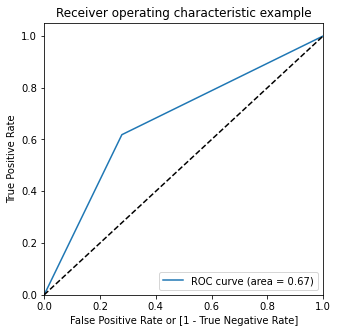

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [78]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.00,5690,0,0,0,0,0,0,0,0,0,0,0
1,0,0.00,1626,0,0,0,0,0,0,0,0,0,0,0
2,0,0.00,2919,0,0,0,0,0,0,0,0,0,0,0
3,1,1.00,2244,1,1,1,1,1,1,1,1,1,1,1
4,0,1.00,6478,1,1,1,1,1,1,1,1,1,1,1


In [83]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.68   0.62   0.72
0.10  0.10      0.68   0.62   0.72
0.20  0.20      0.68   0.62   0.72
0.30  0.30      0.68   0.62   0.72
0.40  0.40      0.68   0.62   0.72
0.50  0.50      0.68   0.62   0.72
0.60  0.60      0.68   0.62   0.72
0.70  0.70      0.68   0.62   0.72
0.80  0.80      0.68   0.62   0.72
0.90  0.90      0.68   0.62   0.72


### Building Model Using PCA to Verify Model Accuracy

to verify if our Logistic Regression model is good enough in terms of accuracy it is offering.

PCA is NOT being used to build final model due to reasons below:

PCA would get us principal components and relating them to original attributes won't be intutive.
Subjectively, PCA is not a good option to deal with categorical variables, and in our scenario, there are mostly categorical variables.

In [90]:
#Initializing the PCA module
pca = PCA(svd_solver='randomized', random_state=100)
     
#Doing the PCA on the train data
pca.fit(df_data_normal_non_outliers)   

PCA(random_state=100, svd_solver='randomized')

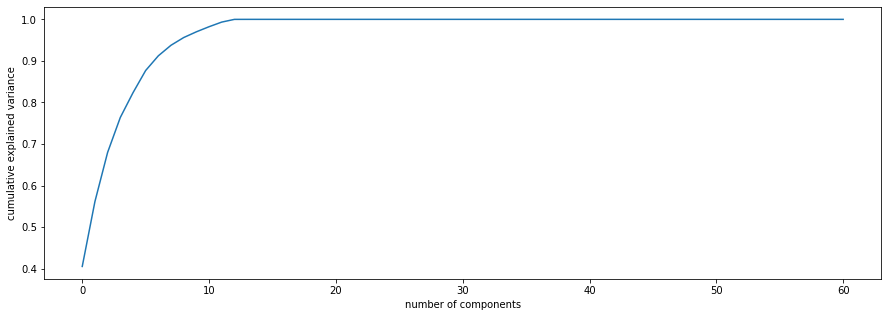

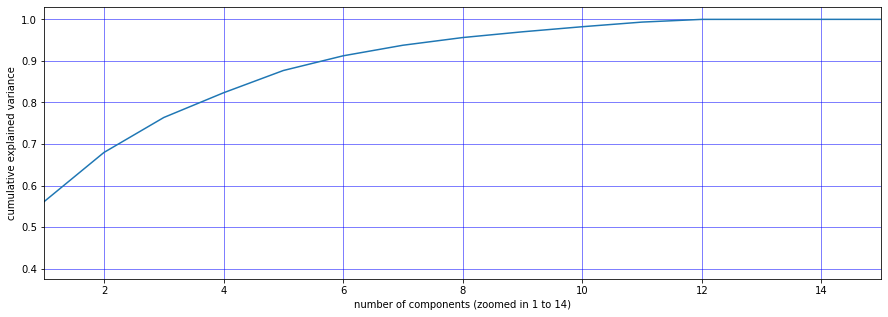

In [91]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (15,5))
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

fig = plt.figure(figsize = (15,5))
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components (zoomed in 1 to 14)')
plt.ylabel('cumulative explained variance')
plt.grid(color='b', linestyle='-', linewidth=.5)
plt.xlim(1,15)
plt.show()
     


#### Performing PCA (Moderate Accuracy) with 75% Variance Cut-off

In [92]:
X_train.shape

(4181, 60)

In [93]:
# Since our dataset is large enough, we will use incremental PCA
pca_moderate = PCA(0.75)
     
df_train_pca_moderate = pca_moderate.fit_transform(X_train)
df_train_pca_moderate.shape
     

(4181, 4)

In [94]:
# Training the Regression Model
learner_pca_moderate = LogisticRegression()
model_pca_lr_moderate = learner_pca_moderate.fit(df_train_pca_moderate,y_train)
     
df_test_pca_moderate = pca_moderate.transform(X_test)
df_test_pca_moderate.shape

(1792, 4)

In [95]:
#Making prediction on the test data
pred_proba_test_moderate = model_pca_lr_moderate.predict_proba(df_test_pca_moderate)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_moderate))

'0.77'

#### Performing PCA (High Accuracy) with 90% Variance Cut-Off

In [96]:
X_train.shape

(4181, 60)

In [97]:
# Since our dataset is large enough, we will use incremental PCA
pca_high = PCA(0.90)
     
df_train_pca_high = pca_high.fit_transform(X_train)
df_train_pca_high.shape
# PCA selected 7 components to explain 90% variance in data

(4181, 7)

In [98]:
# Training the Regression Model
learner_pca_high = LogisticRegression()
model_pca_lr_high = learner_pca_high.fit(df_train_pca_high,y_train)
     
df_test_pca_high = pca_high.transform(X_test)
df_test_pca_high.shape

(1792, 7)

In [99]:
#Making prediction on the test data
pred_proba_test_high = model_pca_lr_high.predict_proba(df_test_pca_high)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_high))

'0.81'

## CONCLUSION

X Education Company needs to focus on following key aspects to improve the overall conversion rate: 
###### *Increase user engagement on their website since this helps in higher conversion.
###### *Increase on sending SMS notifications since this helps in higher conversion.
###### *Get TotalVisits increased by advertising etc. since this helps in higher conversion. 
###### *Improve the Olark Chat service since this is affecting the conversion negatively.